In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Patient data individual/2024-Data/CSV_Files/Final preprocessed data.csv')

In [ ]:
df

,Unnamed: 0,ID,BCODE,UID1,Age,Sex,Smoke,Smoke_amount,Height,Weight,...,Smoking_intensity,latitude,longitude,altitude,Altitude_Category,Average C.PEFR,Standard Deviation PEFR,mean_temperature,mean_humidity,AQI
0,0,SB-001,14631875,BC4386476,43,M,NS,0,156,76,...,Non-smoker,47.275410,8.489700,749.0,Low Altitude,350.83,37.07,11.35,73.50,No data
1,1,SB-002,14010074,BC3298156,66,M,NS,0,163,58,...,Non-smoker,37.498890,126.783060,15.0,Low Altitude,501.31,72.37,11.16,68.82,0.002
2,2,SB-003,14221420,BC4165314,61,M,ES,20,173,67,...,Light smoker,37.474580,126.680240,10.0,Low Altitude,467.17,20.37,11.28,72.08,0.29
3,3,SB-004,14010592,BC4201070,49,M,NS,0,142,51,...,Non-smoker,37.548639,126.682664,38.0,Low Altitude,320.15,24.40,10.92,72.40,0.0049
4,4,SB-005,14010759,BC4212692,53,M,NS,0,156,70,...,Non-smoker,37.498890,126.783060,15.0,Low Altitude,320.15,9.08,11.16,68.82,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,SB-135,14000819,BC3296833,79,M,NS,0,163,67,...,Non-smoker,37.512130,126.785189,21.0,Low Altitude,258.81,19.83,11.16,68.82,0.34
110,110,SB-137,14000774,BC3300701,76,F,NS,0,160,66,...,Non-smoker,37.498890,126.783060,15.0,Low Altitude,258.81,19.83,11.16,68.82,No data
111,111,SB-139,14000670,BC3334855,50,F,ES,20,162,64,...,Light smoker,34.621465,135.533049,8.0,Low Altitude,258.81,19.83,11.16,68.82,No data
112,112,SB-140,14000334,BC3309595,69,F,ES,15,170,72,...,Light smoker,37.498890,126.783060,15.0,Low Altitude,258.81,19.83,11.16,68.82,0.002


In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'BCODE', 'UID1', 'Age', 'Sex', 'Smoke',
       'Smoke_amount', 'Height', 'Weight', 'BMI', 'BSA', 'occupation',
       'occupation_english', 'address', 'address_english', 'Age_group',
       'BMI_category', 'Smoking_intensity', 'latitude', 'longitude',
       'altitude', 'Altitude_Category', 'Average C.PEFR',
       'Standard Deviation PEFR', 'mean_temperature', 'mean_humidity', 'AQI'],
      dtype='object')

In [ ]:
columns = ['Age', 'Smoke_amount', 'Height', 'Weight', 'BMI', 'BSA',
           'latitude', 'longitude', 'altitude', 'Average C.PEFR',
           'Standard Deviation PEFR', 'mean_temperature', 'mean_humidity', 'AQI']


In [ ]:
df['Asthma']='yes'

In [ ]:
df

,Unnamed: 0,ID,BCODE,UID1,Age,Sex,Smoke,Smoke_amount,Height,Weight,...,latitude,longitude,altitude,Altitude_Category,Average C.PEFR,Standard Deviation PEFR,mean_temperature,mean_humidity,AQI,Asthma
0,0,SB-001,14631875,BC4386476,43,M,NS,0,156,76,...,47.275410,8.489700,749.0,Low Altitude,350.83,37.07,11.35,73.50,No data,yes
1,1,SB-002,14010074,BC3298156,66,M,NS,0,163,58,...,37.498890,126.783060,15.0,Low Altitude,501.31,72.37,11.16,68.82,0.002,yes
2,2,SB-003,14221420,BC4165314,61,M,ES,20,173,67,...,37.474580,126.680240,10.0,Low Altitude,467.17,20.37,11.28,72.08,0.29,yes
3,3,SB-004,14010592,BC4201070,49,M,NS,0,142,51,...,37.548639,126.682664,38.0,Low Altitude,320.15,24.40,10.92,72.40,0.0049,yes
4,4,SB-005,14010759,BC4212692,53,M,NS,0,156,70,...,37.498890,126.783060,15.0,Low Altitude,320.15,9.08,11.16,68.82,0.002,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,SB-135,14000819,BC3296833,79,M,NS,0,163,67,...,37.512130,126.785189,21.0,Low Altitude,258.81,19.83,11.16,68.82,0.34,yes
110,110,SB-137,14000774,BC3300701,76,F,NS,0,160,66,...,37.498890,126.783060,15.0,Low Altitude,258.81,19.83,11.16,68.82,No data,yes
111,111,SB-139,14000670,BC3334855,50,F,ES,20,162,64,...,34.621465,135.533049,8.0,Low Altitude,258.81,19.83,11.16,68.82,No data,yes
112,112,SB-140,14000334,BC3309595,69,F,ES,15,170,72,...,37.498890,126.783060,15.0,Low Altitude,258.81,19.83,11.16,68.82,0.002,yes


In [ ]:
df.tail()

,Unnamed: 0,ID,BCODE,UID1,Age,Sex,Smoke,Smoke_amount,Height,Weight,...,latitude,longitude,altitude,Altitude_Category,Average C.PEFR,Standard Deviation PEFR,mean_temperature,mean_humidity,AQI,Asthma
109,109,SB-135,14000819,BC3296833,79,M,NS,0,163,67,...,37.512130,126.785189,21.0,Low Altitude,258.81,19.83,11.16,68.82,0.34,yes
110,110,SB-137,14000774,BC3300701,76,F,NS,0,160,66,...,37.498890,126.783060,15.0,Low Altitude,258.81,19.83,11.16,68.82,No data,yes
111,111,SB-139,14000670,BC3334855,50,F,ES,20,162,64,...,34.621465,135.533049,8.0,Low Altitude,258.81,19.83,11.16,68.82,No data,yes
112,112,SB-140,14000334,BC3309595,69,F,ES,15,170,72,...,37.498890,126.783060,15.0,Low Altitude,258.81,19.83,11.16,68.82,0.002,yes
113,113,SB-141,14000223,BC3294749,71,F,NS,0,162,73,...,37.498890,126.783060,15.0,Low Altitude,258.81,19.83,11.16,68.82,0.002,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               114 non-null    int64  
 1   ID                       114 non-null    object 
 2   BCODE                    114 non-null    object 
 3   UID1                     114 non-null    object 
 4   Age                      114 non-null    int64  
 5   Sex                      114 non-null    object 
 6   Smoke                    114 non-null    object 
 7   Smoke_amount             114 non-null    int64  
 8   Height                   114 non-null    int64  
 9   Weight                   114 non-null    int64  
 10  BMI                      114 non-null    float64
 11  BSA                      114 non-null    float64
 12  occupation               114 non-null    object 
 13  occupation_english       114 non-null    object 
 14  address                  1

<ipython-input-46-27e7367e3b87>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(X_scaled)


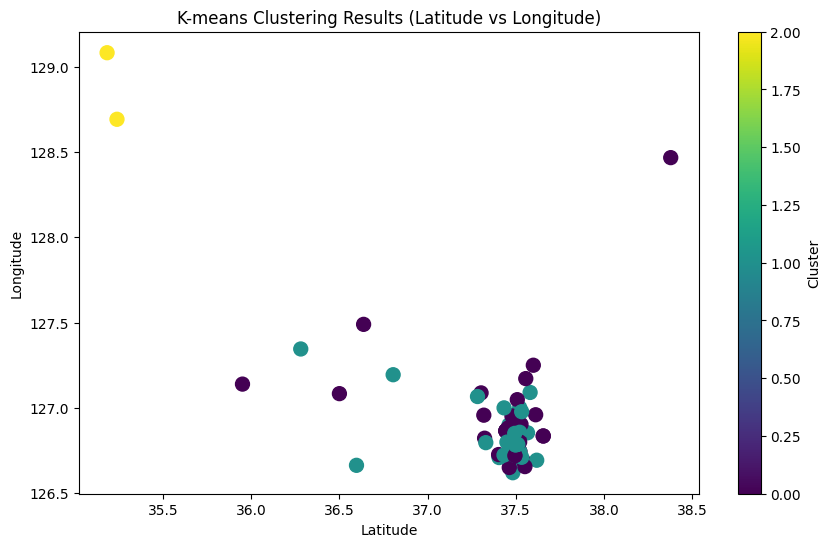

         ID   latitude   longitude  altitude  Cluster
1    SB-002  37.498890  126.783060      15.0        0
2    SB-003  37.474580  126.680240      10.0        1
3    SB-004  37.548639  126.682664      38.0        0
4    SB-005  37.498890  126.783060      15.0        1
5    SB-006  37.581780  127.090340      33.0        1
..      ...        ...         ...       ...      ...
105  SB-130  37.450230  126.799080      32.0        1
107  SB-132  37.495180  126.720070      17.0        0
109  SB-135  37.512130  126.785189      21.0        1
112  SB-140  37.498890  126.783060      15.0        1
113  SB-141  37.498890  126.783060      15.0        1

[97 rows x 5 columns]


In [ ]:
import numpy as np

# Selecting relevant numeric columns for clustering
numeric_columns = ['Age', 'Smoke_amount', 'Height', 'Weight', 'BMI', 'BSA',
                   'latitude', 'longitude', 'altitude', 'Average C.PEFR',
                   'Standard Deviation PEFR', 'mean_temperature', 'mean_humidity', 'AQI']

# Replacing non-numeric values with NaN and converting columns to numeric
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handling missing values: Drop rows with missing values in key numeric columns
df = df.dropna(subset=numeric_columns)

# Extracting only numeric columns for clustering
X = df[numeric_columns]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(df['latitude'], df['longitude'], c=df['Cluster'], cmap='viridis', s=100)
plt.title("K-means Clustering Results (Latitude vs Longitude)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.colorbar(label="Cluster")
plt.show()

# Displaying the clustered dataset
print(df[['ID', 'latitude', 'longitude', 'altitude', 'Cluster']])


<ipython-input-47-ec7a9ac53b3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Asthma'] = df['Asthma'].map({'yes': 1, 'no': 0})
<ipython-input-47-ec7a9ac53b3d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


Cluster Analysis (Numeric Features):
           altitude  mean_temperature  mean_humidity          AQI  \
Cluster                                                             
0         19.692308         11.170385      70.841154     3.101304   
1         26.616667         11.205833      68.782167     1.869518   
2        133.444444         10.816667      70.244444     3.499300   
3         28.000000         10.990000      70.745000  9999.000000   

         Average C.PEFR  Standard Deviation PEFR  Asthma  
Cluster                                                   
0            489.370385                50.099615     1.0  
1            319.815500                22.288667     1.0  
2            328.822222                32.833333     1.0  
3            328.370000                44.530000     1.0  

Age Group Distribution Across Clusters:
Age_Group  Children  Young Adults  Middle-aged  Elderly
Cluster                                                
0                 0             1        

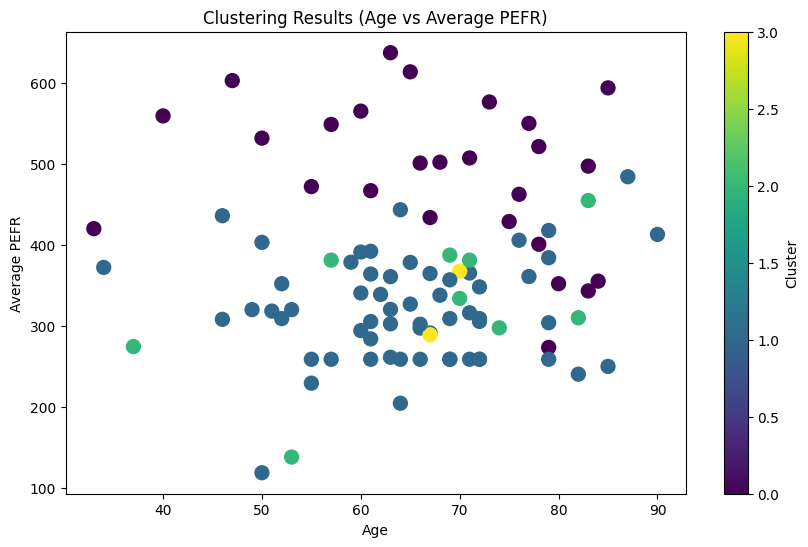

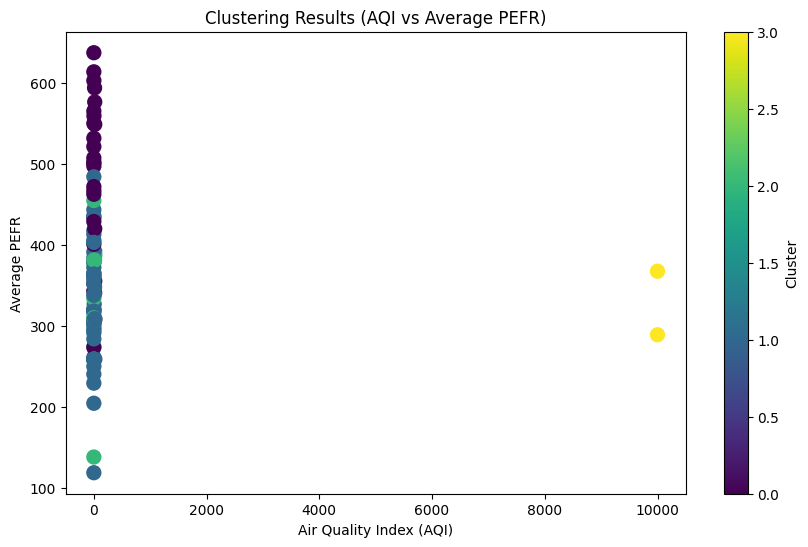

In [ ]:
df['Asthma'] = df['Asthma'].map({'yes': 1, 'no': 0})

# Columns to use for clustering (including 'asthma')
clustering_columns = ['Age', 'altitude', 'mean_temperature', 'mean_humidity', 'AQI',
                      'Average C.PEFR', 'Standard Deviation PEFR', 'Asthma']

# Convert non-numeric values to NaN and ensure columns are numeric
for col in clustering_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in the clustering columns
df = df.dropna(subset=clustering_columns)

# Create Age Group column
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100],
                         labels=['Children', 'Young Adults', 'Middle-aged', 'Elderly'])

# Encode Age_Group as numeric for clustering
df['Age_Group_Numeric'] = df['Age_Group'].cat.codes

# Data for clustering
X = df[['Age_Group_Numeric', 'altitude', 'mean_temperature', 'mean_humidity',
        'AQI', 'Average C.PEFR', 'Standard Deviation PEFR', 'Asthma']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster analysis: Aggregating numeric features
cluster_analysis = df.groupby('Cluster')[
    ['altitude', 'mean_temperature', 'mean_humidity', 'AQI',
     'Average C.PEFR', 'Standard Deviation PEFR', 'Asthma']
].mean()

# Age Group distribution across clusters
age_group_counts = df.groupby('Cluster')['Age_Group'].value_counts().unstack()

# Display the results in the console
print("Cluster Analysis (Numeric Features):")
print(cluster_analysis)

print("\nAge Group Distribution Across Clusters:")
print(age_group_counts)

# Visualization: Age vs Average PEFR
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Average C.PEFR'], c=df['Cluster'], cmap='viridis', s=100)
plt.title("Clustering Results (Age vs Average PEFR)")
plt.xlabel("Age")
plt.ylabel("Average PEFR")
plt.colorbar(label="Cluster")
plt.show()

# Visualization: AQI vs Average PEFR
plt.figure(figsize=(10, 6))
plt.scatter(df['AQI'], df['Average C.PEFR'], c=df['Cluster'], cmap='viridis', s=100)
plt.title("Clustering Results (AQI vs Average PEFR)")
plt.xlabel("Air Quality Index (AQI)")
plt.ylabel("Average PEFR")
plt.colorbar(label="Cluster")
plt.show()


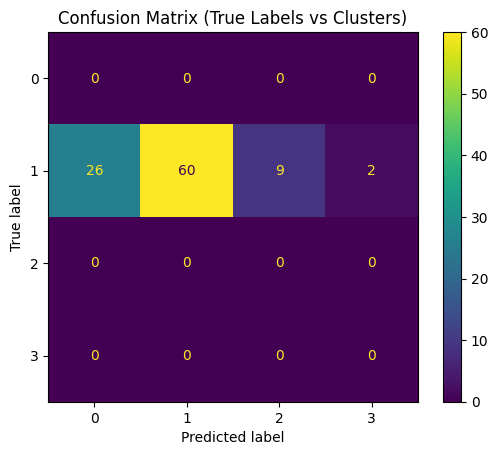

Accuracy: 0.62
Precision: 1.00
Recall: 0.62
Silhouette Score: 0.25
Davies-Bouldin Index: 1.33


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score
from sklearn.metrics import silhouette_score, davies_bouldin_score

if 'Asthma' in df.columns:
    true_labels = df['Asthma']  # Replace 'Asthma' with your actual true label column if different
    predicted_labels = df['Cluster']  # Predicted cluster labels from K-means

    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Ensure the labels for the confusion matrix are consistent
    unique_labels = sorted(set(true_labels) | set(predicted_labels))

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    disp.plot(cmap="viridis")
    plt.title("Confusion Matrix (True Labels vs Clusters)")
    plt.show()

    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
    recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)

    # Display the scores
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
else:
    print("No 'Asthma' column found in the dataset. Cannot generate confusion matrix.")

# Evaluate clustering quality
# Silhouette Score measures how similar data points are within clusters
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])

# Davies-Bouldin Index measures the compactness and separation of clusters (lower is better)
davies_bouldin_avg = davies_bouldin_score(X_scaled, df['Cluster'])

# Display clustering quality metrics
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")


In [ ]:
from sklearn.metrics.pairwise import manhattan_distances, cosine_distances
distances = manhattan_distances(X)

In [ ]:
print(distances)

[[  0.      94.808  256.9529 ... 301.378  295.04   295.04  ]
 [ 94.808    0.     181.0151 ... 223.33   217.568  217.568 ]
 [256.9529 181.0151   0.     ...  88.0651  93.7329  93.7329]
 ...
 [301.378  223.33    88.0651 ...   0.       6.338    6.338 ]
 [295.04   217.568   93.7329 ...   6.338    0.       0.    ]
 [295.04   217.568   93.7329 ...   6.338    0.       0.    ]]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 1 to 113
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Unnamed: 0               97 non-null     int64   
 1   ID                       97 non-null     object  
 2   BCODE                    97 non-null     object  
 3   UID1                     97 non-null     object  
 4   Age                      97 non-null     int64   
 5   Sex                      97 non-null     object  
 6   Smoke                    97 non-null     object  
 7   Smoke_amount             97 non-null     int64   
 8   Height                   97 non-null     int64   
 9   Weight                   97 non-null     int64   
 10  BMI                      97 non-null     float64 
 11  BSA                      97 non-null     float64 
 12  occupation               97 non-null     object  
 13  occupation_english       97 non-null     object  
 14  address         

In [ ]:
columns_to_drop = [
    'ID', 'BCODE', 'UID1',  'Smoke', 'occupation',
    'address',
    'Smoking_intensity'
]

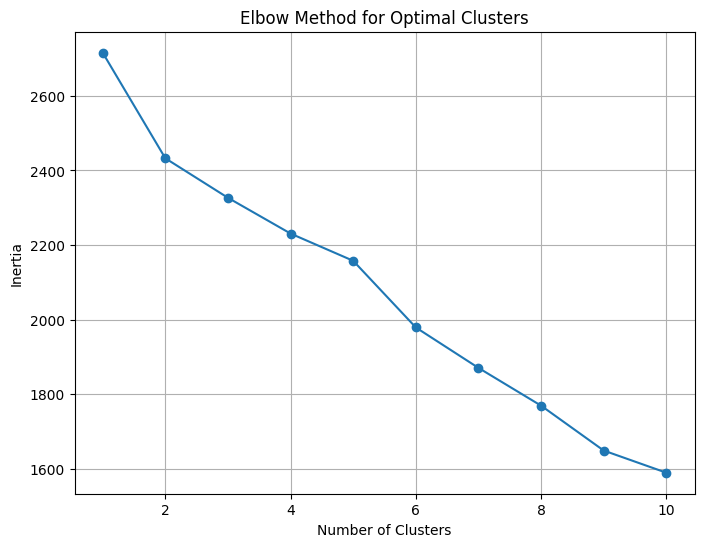

   Unnamed: 0  ID  BCODE  UID1  Age  Sex  Smoke  Smoke_amount  Height  Weight  \
1           1   0     43     5   66    1      1             0     163      58   
2           2   1     68    60   61    1      0            20     173      67   
3           3   2     46    62   49    1      1             0     142      51   
4           4   3     50    65   53    1      1             0     156      70   
5           5   4     18    39   64    1      0            17     172      80   

   ...  Altitude_Category  Average C.PEFR  Standard Deviation PEFR  \
1  ...                  0          501.31                    72.37   
2  ...                  0          467.17                    20.37   
3  ...                  0          320.15                    24.40   
4  ...                  0          320.15                     9.08   
5  ...                  0          443.61                    37.22   

   mean_temperature  mean_humidity     AQI  Asthma  Cluster  Age_Group  \
1             11.1

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

import matplotlib.pyplot as plt

# Convert categorical (object) columns to numerical using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Standardize numerical data
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
standardized_df = scaler.fit_transform(df[numerical_columns])

# Determine optimal number of clusters using the elbow method
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(standardized_df)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Perform KMeans clustering with optimal clusters (e.g., 3)
optimal_clusters = 3  # Change based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(standardized_df)

# Display clustered data
print(df.head())

# Save the clustered data to a CSV file if needed
df.to_csv("clustered_data.csv", index=False)

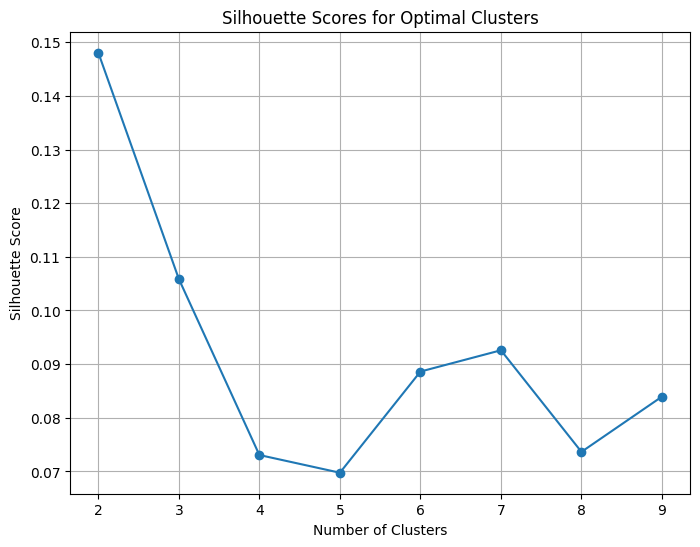

Optimal Number of Clusters: 2
Clustered DataFrame:
     Unnamed: 0  ID  BCODE  UID1  Age  Sex  Smoke  Smoke_amount  Height  \
1             1   0     43     5   66    1      1             0     163   
2             2   1     68    60   61    1      0            20     173   
3             3   2     46    62   49    1      1             0     142   
4             4   3     50    65   53    1      1             0     156   
5             5   4     18    39   64    1      0            17     172   
..          ...  ..    ...   ...  ...  ...    ...           ...     ...   
105         105  92      6    21   69    0      0            10     165   
107         107  93      5    14   61    0      1             0     154   
109         109  94      4     4   79    1      1             0     163   
112         112  95      3     7   69    0      0            15     170   
113         113  96      1     3   71    0      1             0     162   

     Weight  ...  Altitude_Category  Average C.P

In [ ]:
# Step 3: Standardize numerical columns
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaled_features = scaler.fit_transform(df[numerical_columns])

# Step 4: Optimize number of clusters using silhouette score
silhouette_scores = []
cluster_range = range(2, 10)  # Start with 2 clusters as silhouette is undefined for 1 cluster

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

# Step 5: Finalize clustering with optimal number of clusters
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Save or display results
print("Optimal Number of Clusters:", optimal_clusters)
print("Clustered DataFrame:")
print(df)


print("Clustered data saved to 'clustered_data.csv'.")

In [ ]:
# Step 5: Finalize clustering with optimal number of clusters
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 6: Find the best features based on cluster centroids
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(cluster_centers, columns=numerical_columns)

# Calculate variance of features across centroids
centroid_variance = centroids_df.var().sort_values(ascending=False)

print("Optimal Number of Clusters:", optimal_clusters)
print("\nClustered DataFrame Head:")
print(df.head())

print("\nBest Features Based on Variance Across Clusters:")
print(centroid_variance)


print("Feature importance saved to 'feature_importance.csv'.")

Optimal Number of Clusters: 2

Clustered DataFrame Head:
   Unnamed: 0  ID  BCODE  UID1  Age  Sex  Smoke  Smoke_amount  Height  Weight  \
1           1   0     43     5   66    1      1             0     163      58   
2           2   1     68    60   61    1      0            20     173      67   
3           3   2     46    62   49    1      1             0     142      51   
4           4   3     50    65   53    1      1             0     156      70   
5           5   4     18    39   64    1      0            17     172      80   

   ...  Altitude_Category  Average C.PEFR  Standard Deviation PEFR  \
1  ...                  0          501.31                    72.37   
2  ...                  0          467.17                    20.37   
3  ...                  0          320.15                    24.40   
4  ...                  0          320.15                     9.08   
5  ...                  0          443.61                    37.22   

   mean_temperature  mean_humidity 

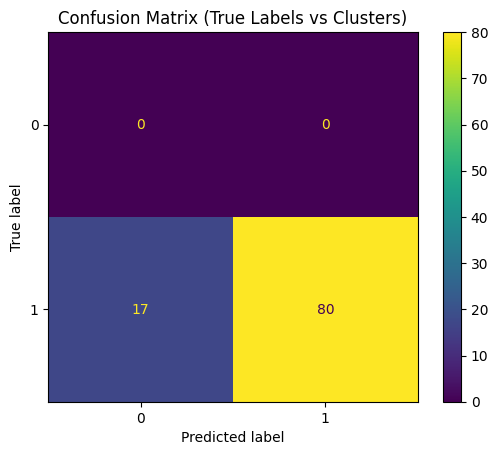

Accuracy: 0.82
Precision: 1.00
Recall: 0.82
Silhouette Score: -0.05
Davies-Bouldin Index: 4.88


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score
from sklearn.metrics import silhouette_score, davies_bouldin_score

if 'Asthma' in df.columns:
    true_labels = df['Asthma']  # Replace 'Asthma' with your actual true label column if different
    predicted_labels = df['Cluster']  # Predicted cluster labels from K-means

    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Ensure the labels for the confusion matrix are consistent
    unique_labels = sorted(set(true_labels) | set(predicted_labels))

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    disp.plot(cmap="viridis")
    plt.title("Confusion Matrix (True Labels vs Clusters)")
    plt.show()

    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
    recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)

    # Display the scores
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
else:
    print("No 'Asthma' column found in the dataset. Cannot generate confusion matrix.")

# Evaluate clustering quality
# Silhouette Score measures how similar data points are within clusters
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])

# Davies-Bouldin Index measures the compactness and separation of clusters (lower is better)
davies_bouldin_avg = davies_bouldin_score(X_scaled, df['Cluster'])

# Display clustering quality metrics
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    ConfusionMatrixDisplay,
)
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import mode


In [ ]:
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaled_features = scaler.fit_transform(df[numerical_columns])


In [ ]:
if 'Asthma' in df.columns and len(df['Asthma'].unique()) > 1:
    from imblearn.over_sampling import SMOTE

    # Handle class imbalance using SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(scaled_features, df['Asthma'])
    print(f"Original class distribution: {df['Asthma'].value_counts()}")
    print(f"Resampled class distribution: {pd.Series(y_resampled).value_counts()}")
else:
    print("Skipping SMOTE as 'Asthma' column has only one class or does not exist.")
    X_resampled = scaled_features
    y_resampled = df['Asthma'] if 'Asthma' in df.columns else None

Skipping SMOTE as 'Asthma' column has only one class or does not exist.


In [ ]:
# Dimensionality reduction using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X_resampled)

In [ ]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(reduced_features)

In [ ]:
# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(reduced_features)

In [ ]:
# Step 3: Map Clusters to True Labels (if true labels are available)
if y_resampled is not None:
    def map_clusters_to_labels(cluster_labels, true_labels):
        mapping = {}
        for cluster in np.unique(cluster_labels):
            mask = cluster_labels == cluster
            if len(true_labels[mask]) > 0:  # Avoid empty clusters
                common_label = mode(true_labels[mask]).mode[0]
                mapping[cluster] = common_label
            else:
                mapping[cluster] = -1  # Assign a placeholder for empty clusters
        return np.array([mapping[label] for label in cluster_labels])


In [ ]:
from scipy.stats import mode
import numpy as np

# Function to map clusters to true labels
def map_clusters_to_labels(cluster_labels, true_labels):
    mapping = {}
    for cluster in np.unique(cluster_labels):
        mask = cluster_labels == cluster
        if np.any(mask):  # Check if there are any points in the cluster
            cluster_labels_for_mapping = true_labels[mask]
            if len(cluster_labels_for_mapping) > 0:  # Avoid empty clusters
                common_label = mode(cluster_labels_for_mapping, keepdims=True).mode[0]
                mapping[cluster] = common_label
            else:
                mapping[cluster] = -1  # Assign a placeholder for empty clusters
        else:
            mapping[cluster] = -1  # Handle edge cases where cluster is empty
    return np.array([mapping[label] for label in cluster_labels])

# Replace this function in the earlier script



KMeans Clustering:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


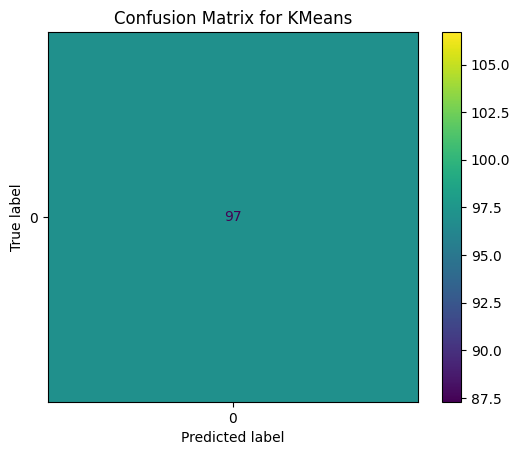


DBSCAN Clustering:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


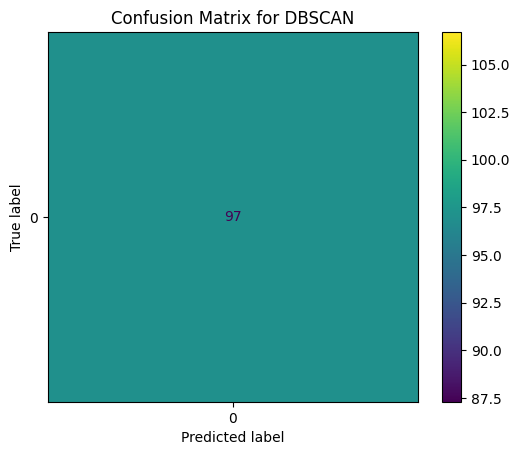


GMM Clustering:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


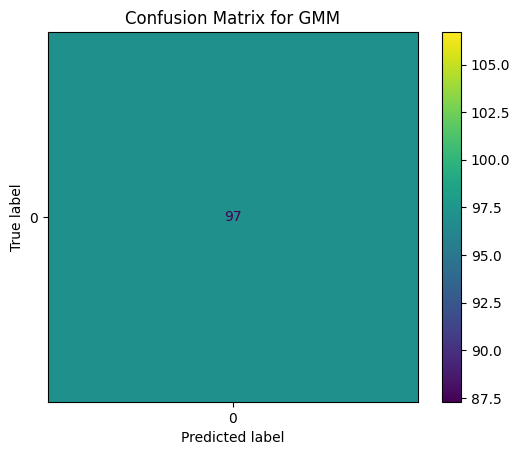

In [ ]:
# Align clusters for each algorithm
kmeans_mapped = map_clusters_to_labels(kmeans_labels, y_resampled)
dbscan_mapped = map_clusters_to_labels(dbscan_labels, y_resampled)
gmm_mapped = map_clusters_to_labels(gmm_labels, y_resampled)

# Evaluate Accuracy, Precision, Recall
for name, predicted_labels in zip(
    ["KMeans", "DBSCAN", "GMM"], [kmeans_mapped, dbscan_mapped, gmm_mapped]
):
    accuracy = accuracy_score(y_resampled, predicted_labels)
    precision = precision_score(y_resampled, predicted_labels, average="weighted", zero_division=0)
    recall = recall_score(y_resampled, predicted_labels, average="weighted", zero_division=0)
    print(f"\n{name} Clustering:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_resampled, predicted_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="viridis")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()


In [ ]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_features)
    silhouette_avg = silhouette_score(reduced_features, cluster_labels)
    davies_bouldin = davies_bouldin_score(reduced_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    davies_bouldin_scores.append(davies_bouldin)

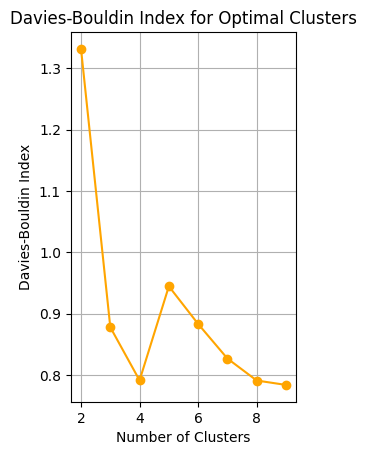

In [ ]:
# Davies-Bouldin Index
plt.subplot(1, 2, 2)
plt.plot(cluster_range, davies_bouldin_scores, marker='o', color='orange')
plt.title('Davies-Bouldin Index for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.grid()


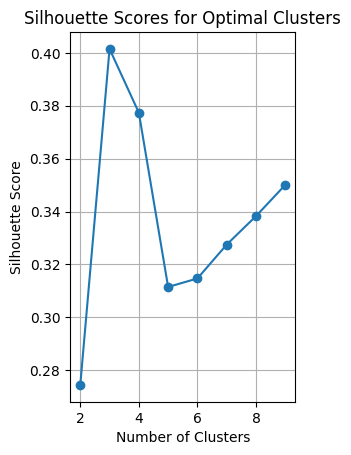

In [ ]:
# Silhouette Scores
plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()


In [ ]:
# Final clustering
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal Number of Clusters: {optimal_clusters}")

Optimal Number of Clusters: 3


In [ ]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(reduced_features)


In [ ]:
# Evaluate the final clustering
final_silhouette = silhouette_score(reduced_features, df['Cluster'])
final_davies_bouldin = davies_bouldin_score(reduced_features, df['Cluster'])

In [ ]:
print(f"Final Silhouette Score: {final_silhouette:.2f}")
print(f"Final Davies-Bouldin Index: {final_davies_bouldin:.2f}")

Final Silhouette Score: 0.40
Final Davies-Bouldin Index: 0.88


In [ ]:
# Post-clustering analysis (if true labels are available)
if 'Asthma' in df.columns and len(df['Asthma'].unique()) > 1:
    true_labels = y_resampled
    predicted_labels = df['Cluster']

    # Align clusters to labels
    cm = confusion_matrix(true_labels, predicted_labels)
    unique_labels = np.unique(np.concatenate([true_labels, predicted_labels]))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    disp.plot(cmap="viridis")
    plt.title("Confusion Matrix (True Labels vs Clusters)")
    plt.show()

In [ ]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)


In [ ]:
# Display the scores
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.28
Precision: 1.00
Recall: 0.28


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from scipy.stats import mode
import numpy as np
import pandas as pd

# Assuming `X_resampled` (features) and `y_resampled` (true labels) are prepared
# Step 1: Feature Engineering with PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X_resampled)

# Step 2: Clustering Algorithms
# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced_features)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(reduced_features)

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(reduced_features)

# Step 3: Map Clusters to True Labels (if true labels are available)
if y_resampled is not None:
    def map_clusters_to_labels(cluster_labels, true_labels):
        mapping = {}
        for cluster in np.unique(cluster_labels):
            mask = cluster_labels == cluster
            if len(true_labels[mask]) > 0:  # Avoid empty clusters
                common_label = mode(true_labels[mask]).mode[0]
                mapping[cluster] = common_label
            else:
                mapping[cluster] = -1  # Assign a placeholder for empty clusters
        return np.array([mapping[label] for label in cluster_labels])

    # Align clusters for each algorithm
    kmeans_mapped = map_clusters_to_labels(kmeans_labels, y_resampled)
    dbscan_mapped = map_clusters_to_labels(dbscan_labels, y_resampled)
    gmm_mapped = map_clusters_to_labels(gmm_labels, y_resampled)

    # Step 4: Evaluate Accuracy, Precision, and Recall for each algorithm
    for name, predicted_labels in zip(
        ["KMeans", "DBSCAN", "GMM"], [kmeans_mapped, dbscan_mapped, gmm_mapped]
    ):
        accuracy = accuracy_score(y_resampled, predicted_labels)
        precision = precision_score(y_resampled, predicted_labels, average="weighted", zero_division=0)
        recall = recall_score(y_resampled, predicted_labels, average="weighted", zero_division=0)
        print(f"\n{name} Clustering:")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")

        # Confusion Matrix
        cm = confusion_matrix(y_resampled, predicted_labels)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap="viridis")
        plt.title(f"Confusion Matrix for {name}")
        plt.show()
else:
    print("No true labels available for evaluation.")


IndexError: invalid index to scalar variable.